In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


## Loading our model

In [2]:
from keras.models import load_model


In [3]:
model2 = load_model('trained_plant_disease_model.keras')


## Visualizing Single Image of Test Set

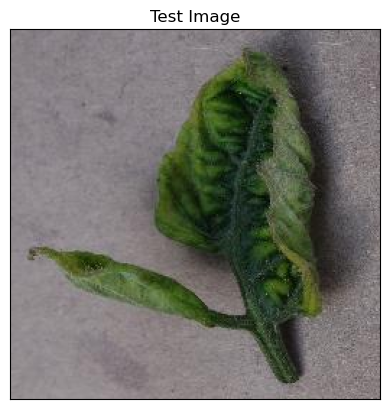

In [13]:
import cv2
image_path='test/test/TomatoYellowCurlVirus3.JPG'
#Reading Image
img=cv2.imread(image_path) 
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#Since we trained our model with rgb colors and cv2 will give image only in bgr we are converting bgr image to rgb
#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])#To remove X axis
plt.yticks([])#To remove Y axis
plt.show()

## Testing Model

In [14]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))#This is done to convert image dimension to 128 since we trained the model in that format
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])#Convert single image to batch.This is done because we want our result in the form of batch since we trained our model with batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [15]:
prediction=model2.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[1.2282846e-05, 2.7477927e-06, 9.2324794e-05, 8.6745931e-05,
         1.5374697e-04, 1.2023442e-04, 1.6676695e-06, 4.0023551e-06,
         1.2493009e-06, 1.1080302e-05, 3.1961810e-07, 5.1337529e-06,
         3.7394588e-05, 5.2198561e-06, 1.2292210e-07, 2.2978468e-04,
         1.9423587e-05, 1.0130167e-05, 1.0983420e-04, 7.3299234e-05,
         3.8380145e-07, 8.0514783e-06, 7.7991472e-06, 7.1607945e-05,
         1.7435716e-05, 1.0596912e-05, 1.2217327e-04, 3.4888111e-05,
         4.3165339e-05, 2.3581944e-02, 2.1944991e-04, 5.3168176e-04,
         6.6457340e-04, 3.5367016e-04, 3.0951947e-04, 9.7184843e-01,
         1.1614913e-03, 3.6500489e-05]], dtype=float32),
 (1, 38))

In [16]:
result_index=np.argmax(prediction)
result_index

35

In [17]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

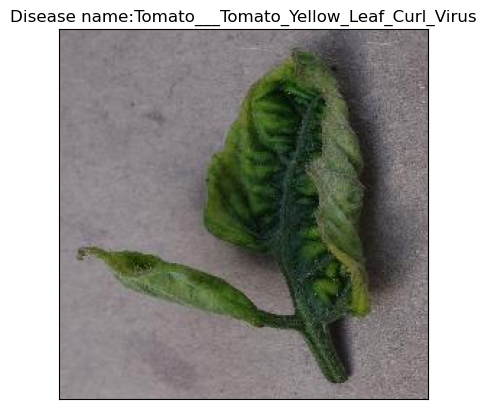

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

In [18]:
#Displaying Result of disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease name:{model_prediction}")
plt.xticks([])#To remove X axis
plt.yticks([])#To remove Y axis
plt.show()
model_prediction